In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy

In [3]:
from tbcontrol.responses import sopdt

## Strategies for filtering out noise from a sampled signal

In some cases our measurements have been altered by some kind of noise. Commonly this is "white noise", which is normally distributed with zero mean.

In [4]:
N = 100

In [5]:
t = numpy.linspace(0, 70, N)

In [6]:
y = sopdt(t, K=1, tau=5, zeta=0.6, theta=10)

In [7]:
ym = y + numpy.random.randn(N)*0.1

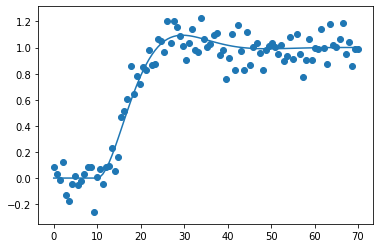

In [8]:
plt.scatter(t, ym)
plt.plot(t, y)

### Pandas

Pandas includes many common filtering strategies in an easy-to-use package. Let's get the data into a DataFrame.

In [9]:
import pandas

In [10]:
df = pandas.DataFrame({'t': t, 'y': y, 'ym': ym}).set_index('t')

In [11]:
def noisy_and_original():
    df['ym'].plot(style='.')
    df['y'].plot()

In [12]:
measured = df['ym']

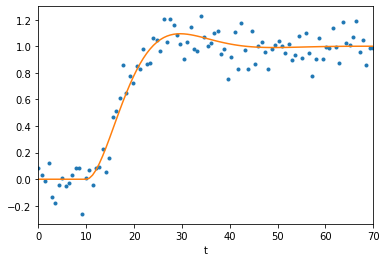

In [13]:
noisy_and_original()

## Moving averages
Moving averages are a very common way to filter out noise. The idea is to average together a certain number of samples to get the value of a sample. This operation is common enough that it can selected as a dropdown option in Excel.

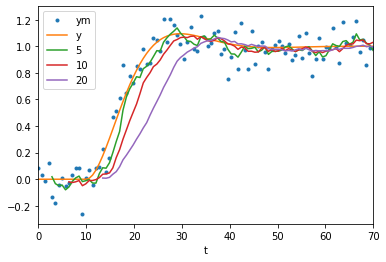

In [14]:
def moving(center=False):
    noisy_and_original()
    for window in [5, 10, 20]:
        measured.rolling(window, center=center).mean().plot(label=window)
    plt.legend()
    
moving()

As with all causal filters (filters which only use information from _before_ the point at which they calculate a value) we see that the filter introduces a delay between the original signal and the filtered signal. 

In Pandas it is easy to get a less delayed result by using a centered moving average (where points before _and_ after the reported time are used).

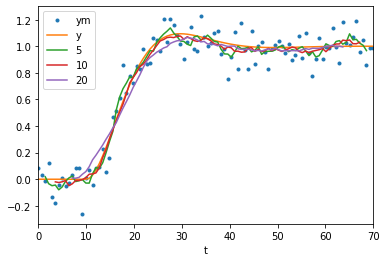

In [15]:
moving(center=True)

Note that these signals are much closer to the original data. As a general rule, non-causal filters outperform their causal counterparts at the cost of having to be done offline. However, also notice that the wider windows are making the response look less sharp at the start and suppressing the overshoot.

### Exponentially weighted moving average
Pandas also includes an easy way to produce exponentially weighted moving averages. These are the digital equivalent of first order analog filters.

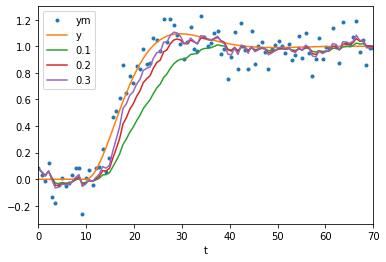

In [16]:
noisy_and_original()
for alpha in [0.1, 0.2, 0.3]:
    measured.ewm(alpha=alpha).mean().plot(label=alpha)
plt.legend()